# Calculate robusteness from pi control runs

In [459]:
# Some definitions

# directory of data
#fdir = '~/Google Drive/professional/research/FARALLON_INSTITUTE_PROJECTS/2020 NOAA MAPP/Climate_extremes_sharedfigsandcode/data/FOR SCATTER PLOT/'
fdir = '/Volumes/GoogleDrive/My Drive/Climate_extremes_sharedfigsandcode/data/Annual_TimeSeries/'

In [460]:
# Modules
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore') #filter some warning messages
import seaborn as sns

In [461]:
loc='cclme'
runs='picontrol'
pct1=90
pct2=10
fin1 = fdir+'original ts/'+runs+'_'+loc+'_sst.nc'
fin2 = fdir+'original ts/'+runs+'_sm.nc'
modsst = xr.open_dataset(fin1)
modsst.close()
modsm2 = xr.open_dataset(fin2)
modsm2.close()

pisst=modsst.mean('model')
pism=modsm2.mean('model')


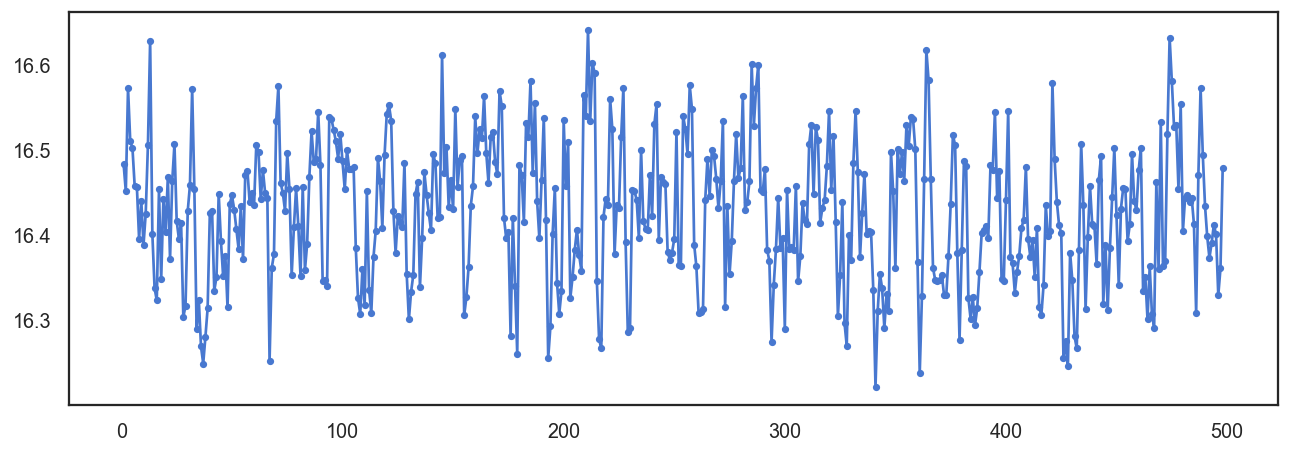

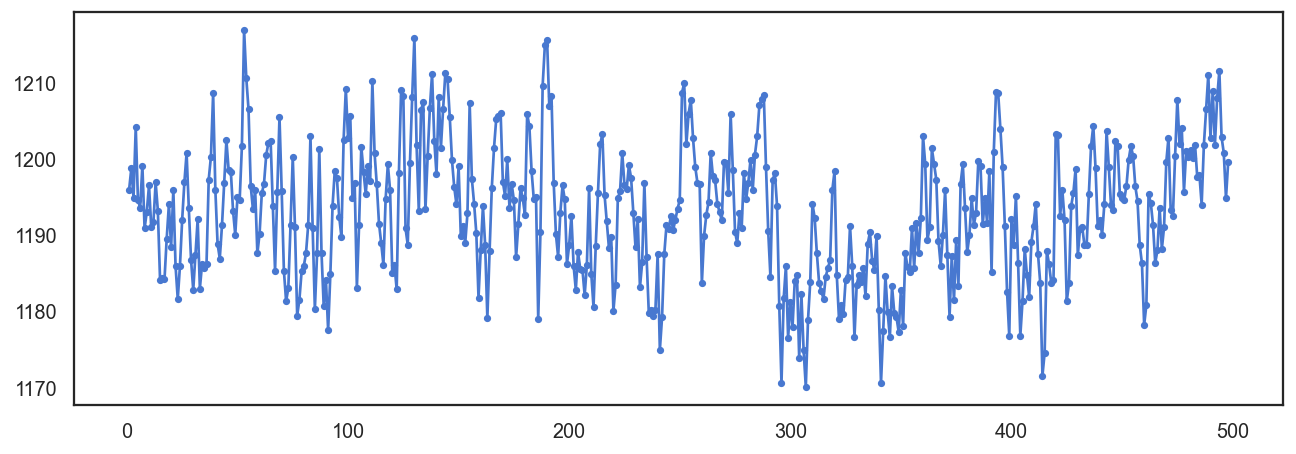

In [462]:
pisst=np.nanmean(modsst.sst,axis=0)
pism=np.nanmean(modsm2.sm,axis=0)

plt.figure(figsize=(12,4),dpi=130)
plt.plot(modsst.year,pisst,'.-')
plt.figure(figsize=(12,4),dpi=130)
plt.plot(modsm2.year,pism,'.-')




In [463]:
def num_coevents(y1, y2, pct1, pct2, runs='picontrol',loc='cclme'):
    # 
    fin1 = fdir+'original ts/'+runs+'_'+loc+'_sst.nc'
    fin2 = fdir+'original ts/'+runs+'_sm.nc'
    modsst = xr.open_dataset(fin1)
    modsst.close()
    modsm2 = xr.open_dataset(fin2)
    modsm2.close()
    
    models = modsm2.model

    # selec periood
    modsst = modsst.sel(year=slice(y1,y2))
    #modsm2 = modsm2.sel(year=slice(y1-1,y2-1))
    modsm2 = modsm2.sel(year=slice(y1,y2))

    
    nev = list()
    mhw = list()
    drt = list()
    for ix,i in enumerate(models):
        #print(ix,i)
        tmp1= modsst.sel(model=i).sst.values
        tmp2= modsm2.sel(model=i).sm.values
    
        # calculate threshold
        mhw_thr = np.nanpercentile(tmp1,pct1)
        drg_thr = np.nanpercentile(tmp2,pct2)
        
        mhw.append(mhw_thr)
        drt.append(drg_thr)
        
    return mhw, drt # sum(nev)

In [464]:
ny = 30
prc1 = 90
prc2 = 10
pinev=list()
pim=list()
pid=list()
for i in range(int(500/ny)):
    m0,d0 = num_coevents(i*ny+1, (i+1)*ny, prc1 , prc2, loc=loc)
    pim.append(m0)
    pid.append(d0)
m_thr=np.mean(pim)
d_thr=np.mean(pid) 

m_ind=np.mean(pim,axis=0)
d_ind=np.mean(pid,axis=0) 
d_ind.shape


(22,)

In [465]:
file = fdir+'original ts/'+'./obs_ts.xlsx' # obs indices.xlsx'
df = pd.read_excel(file)
#df = df.rename(columns={'cclme_SSTA_hydro_ann':'CC_SST','nino_hydro_ann':'NINO','pdsi_anom_ann_hydro':'CA_PDSI','ca_pr_anom_hydro_ann':'CA_PRCP', 'goa_SSTA_hydro_ann':'GOA_SST', 'GOA_SSTA_6mo':'GOA_SST_6mo' ,'goa_SSTA_hydro_ann_12mo': 'GOA_SST_LEAD'  })
df
df

,Unnamed: 0,year,nino,sst,pr,pdsi,sm,goa_sst
0,0,1900,NaN,NaN,NaN,0.721667,NaN,NaN
1,1,1901,27.261850,16.829166,NaN,1.702500,NaN,12.809047
2,2,1902,26.767965,16.634994,1.561781,0.994167,NaN,12.593447
3,3,1903,28.030883,16.627659,1.597637,1.012500,NaN,12.457354
4,4,1904,26.382762,16.402490,1.776581,0.593333,NaN,12.475911
...,...,...,...,...,...,...,...,...
115,115,2015,27.666291,18.626306,1.314730,-5.377500,351.264837,13.899565
116,116,2016,28.720407,18.508735,1.729328,-3.305833,366.556740,13.606849
117,117,2017,26.642849,17.574502,2.344241,0.380000,408.123276,13.274127
118,118,2018,26.491223,17.597217,1.160726,-2.162500,373.505885,13.274407


In [466]:
loc='cclme'
runs='histssp585'
pct1=90
pct2=10
fin1 = fdir+'original ts/'+runs+'_'+loc+'_sst.nc'
fin2 = fdir+'original ts/'+runs+'_sm.nc'
modsst = xr.open_dataset(fin1)
modsst.close()
modsm = xr.open_dataset(fin2)
modsm.close()

sst=modsst.sel(model=modsm1.model)
sm=modsm
sst

sst

<xarray.Dataset>
Dimensions:  (model: 22, year: 251)
Coordinates:
  * model    (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100
Data variables:
    sst      (model, year) float64 ...

In [467]:
loc='cclme'
runs='ssp585'
pct1=90
pct2=10
fin1 = fdir+'original ts/'+runs+'_'+loc+'_sst.nc'
fin2 = fdir+'original ts/'+runs+'_sm.nc'
modsst1 = xr.open_dataset(fin1)
modsst1.close()
modsm1 = xr.open_dataset(fin2)
modsm1.close()

sst=modsst.merge(modsst1).sel(model=modsm1.model)
sm=modsm.merge(modsm1)
sm

<xarray.Dataset>
Dimensions:  (model: 22, year: 251)
Coordinates:
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100
  * model    (model) object 'ACCESS-CM2' 'ACCESS-ESM1-5' ... 'UKESM1-0-LL'
Data variables:
    sm       (model, year) float64 nan 1.13e+03 1.114e+03 ... 660.5 635.3 667.1

In [468]:
hifusst=sst.mean('model')
hifusm=sm.mean('model')
hifusst,
hifusm.max

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:  (year: 251)
Coordinates:
  * year     (year) int64 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100
Data variables:
    sm       (year) float64 nan 1.179e+03 1.184e+03 ... 1.162e+03 1.155e+03>

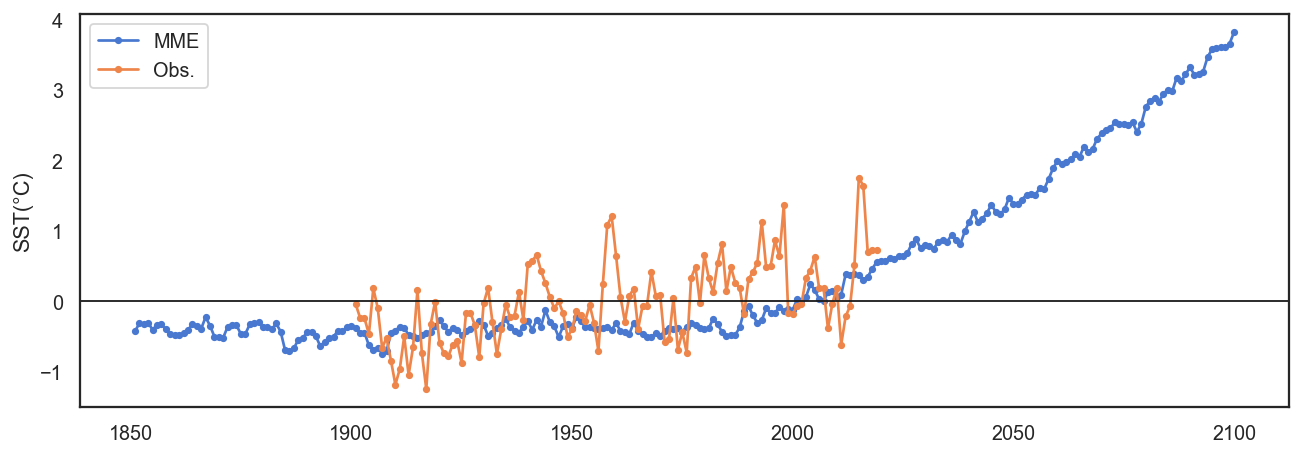

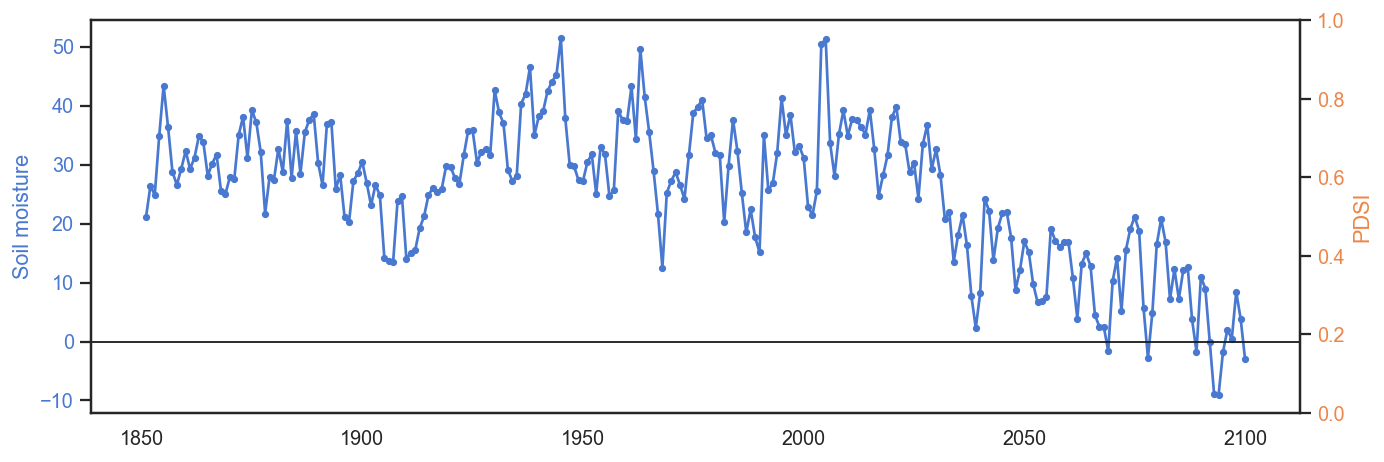

In [469]:
plt.figure(figsize=(12,4),dpi=130)

plt.plot(hifusst.year,hifusst.sst-m_thr,'.-',label='MME')
#plt.axhline(y=m_thr,color='red', ls='--',linewidth=1)
plt.plot(df.year,df.sst-m_thr,'.-',label='Obs.')
plt.axhline(y=0,color='k', ls='-',linewidth=1)
plt.ylabel('SST(°C)')

plt.legend()
plt.show()


fig, ax1 = plt.subplots(figsize=(12,4),dpi=130)


ax1.set_ylabel('Soil moisture', color='C0')
ax1.plot(hifusm.year,hifusm.sm-d_thr,'.-', color='C0',label='MME')
#ax1.axhline(y=d_thr,color='red', ls='--',linewidth=1)
ax1.tick_params(axis='y', labelcolor='C0')
ax1.axhline(y=0,color='k', ls='-',linewidth=1)


ax2 = ax1.twinx() 
ax2.set_ylabel('PDSI', color='C1')
#ax2.plot(df.year,df.pdsi, '.-',color='C1',label='Obs.')
ax2.tick_params(axis='y', labelcolor='C1')

plt.show()

In [470]:
# PDSI and SM var ratio
#ratio=(np.nanstd(df.pdsi))**2/(np.mean(np.nanstd(sm.sm,axis=1)))**2
ratio=np.nanstd(df.pdsi)/np.mean(np.nanstd(sm.sm.sel(year=slice(1900,2019)),axis=1))

ratio, 
mean2=np.nanmean(df.pdsi),  
mean1=np.mean(sm.sm.sel(year=slice(1900,2019)))
mean1,mean2

est_thr=(d_thr- mean1.values)*ratio+mean2
est_thr,np.nanpercentile(df.pdsi,10)

(array([-1.98225432]), -2.1913333333333336)

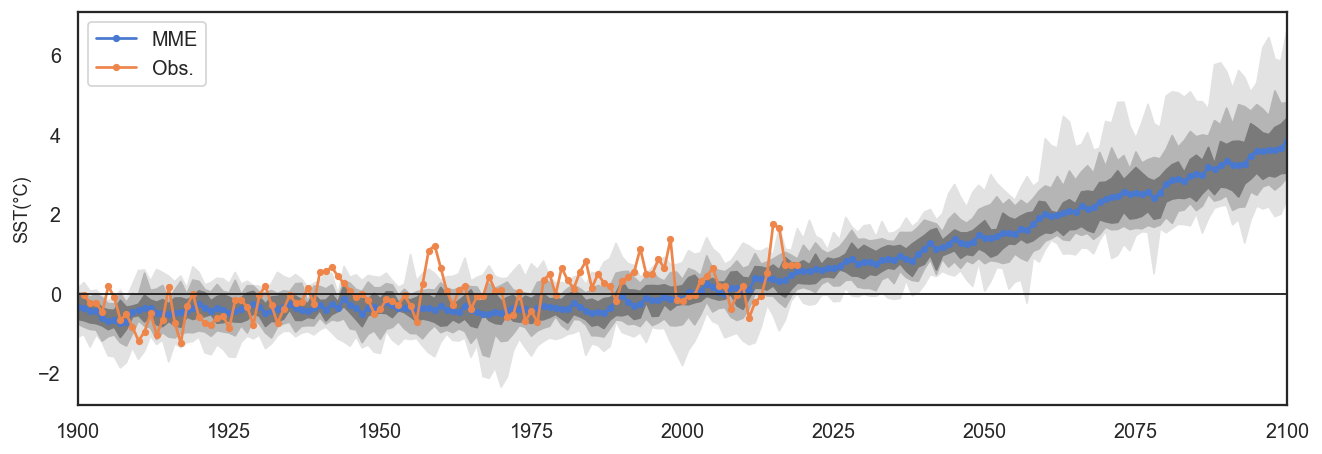

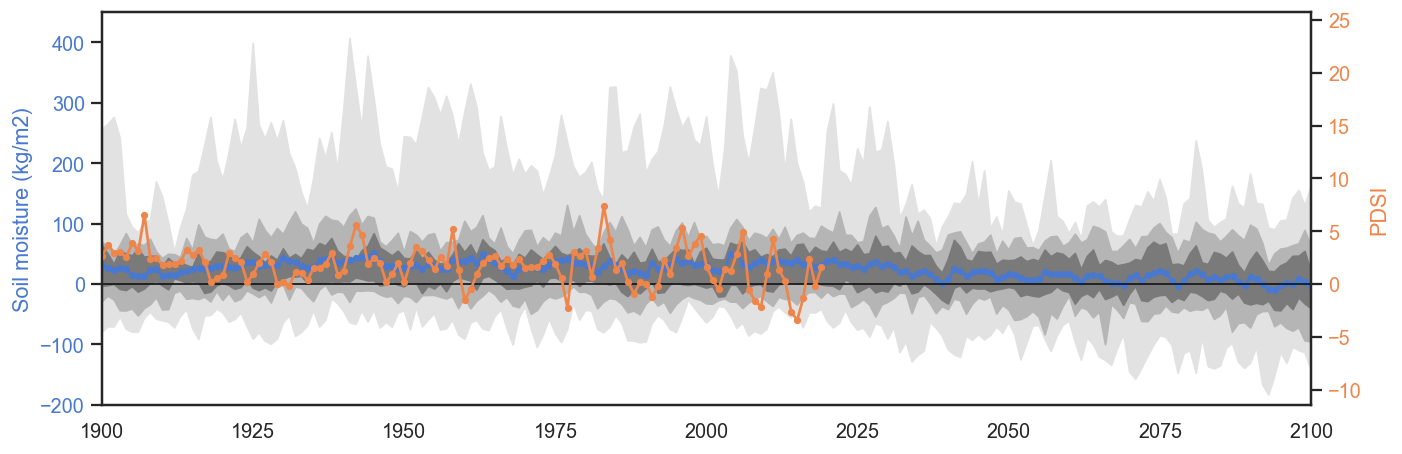

(array([-1.98225432]),
 -2.1913333333333336,
 16.86737954106295,
 17.521374718348184)

In [471]:
from matplotlib import cm
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)


#fig,  ax1 = plt.subplots(figsize=(12,4),dpi=130)
plt.figure(figsize=(12,4),dpi=130)
#ax3=plt.subplot(2,1,1)

TS=sst
nbr_length=len(TS.year)
SampleData=np.zeros((len(TS.model),len(TS.year)))
for i in range(22):
    SampleData[i,:]=TS.sst[i,:]-m_ind[i] 
    
n = 7 # change this value for the number of iterations/percentiles
colormap = cm.Greys # change this for the colormap of choice
percentiles = [0,10,25,50,75,90,100]
SDist=np.zeros((n,nbr_length))
for i in range(n):
    for t in range(nbr_length):
        SDist[i,t]=np.nanpercentile(SampleData[:,t],percentiles[i])
half = int((n-1)/2)
for i in range(half):
    plt.fill_between(TS.year, SDist[i,:],SDist[-(i+1),:],color=colormap(i/5+.2))
    
plt.plot(hifusst.year,hifusst.sst-m_thr,'.-',label='MME')
#plt.axhline(y=m_thr,color='red', ls='--',linewidth=1)
plt.plot(df.year,df.sst-m_thr,'.-',label='Obs.') #-np.nanpercentile(df.sst,90)
plt.ylabel('SST(°C)',fontsize=10)
plt.axhline(y=0,color='k', ls='-',linewidth=1)
plt.xlim([1900,2100])


plt.legend(loc='upper left')
plt.show()



fig, ax1 = plt.subplots(figsize=(12,4),dpi=130)
#ax1=plt.subplot(2,1,2)

TS=sm
nbr_length=len(TS.year)
SampleData=np.zeros((len(TS.model),len(TS.year)))
for i in range(22):
    SampleData[i,:]=TS.sm[i,:]-d_ind[i] 
    
n = 7 # change this value for the number of iterations/percentiles
colormap = cm.Greys # change this for the colormap of choice
percentiles = [0,10,25,50,75,90,100]
SDist=np.zeros((n,nbr_length))
for i in range(n):
    for t in range(nbr_length):
        SDist[i,t]=np.nanpercentile(SampleData[:,t],percentiles[i])
half = int((n-1)/2)
for i in range(half):
    plt.fill_between(TS.year, SDist[i,:],SDist[-(i+1),:],color=colormap(i/5+.2))
    #plt.plot(SampleData.year, SDist[i,:],SDist[-(i+1),:],color=colormap(i/5+.2))

    
    
ax1.set_ylabel('Soil moisture (kg/m2)', color='C0')
ax1.plot(hifusm.year,hifusm.sm-d_thr,'.-', color='C0',label='MME')
#ax1.axhline(y=d_thr,color='red', ls='--',linewidth=1)
ax1.tick_params(axis='y', labelcolor='C0')
ax1.axhline(y=0,color='k', ls='-',linewidth=1)
ax1.set_xlim([1900,2100])
ax1.set_ylim([-200,450])

ax2 = ax1.twinx() 
ax2.set_ylabel('PDSI', color='C1')
ax2.plot(df.year,df.pdsi-est_thr, '.-',color='C1',label='Obs.') #  np.nanpercentile(df.pdsi,10)
ax2.tick_params(axis='y', labelcolor='C1')
ax2.set_ylim([-200*ratio,450*ratio])

#low=(-200- mean1.values)*ratio+mean2
#up=(450- mean1.values)*ratio+mean2
#ax2.set_ylim([low,up])


plt.show()
est_thr,np.nanpercentile(df.pdsi,10),m_thr,np.nanpercentile(df.sst,90)

In [472]:
m_thr,df.goa_sst.quantile(.9)
est_d_thr=np.float(est_thr)

In [473]:
df_30=df[(df.year>=1985)&(df.year<=2014)]

In [474]:
thresh=[df.quantile(.1),df.quantile(.9)]
print(thresh)
newdf=df_30.loc[(df_30['goa_sst']>= m_thr) & (df_30['pdsi'] <= est_d_thr)]
coo=len(newdf)
newdf=df_30.loc[(df_30['goa_sst']>= m_thr) ]
mhw=len(newdf)
newdf=df_30.loc[ (df_30['pdsi'] <= est_d_thr)]
drt=len(newdf)

coo,mhw,drt

[Unnamed: 0      11.900000
year          1911.900000
nino            26.000645
sst             16.157960
pr               1.150792
pdsi            -2.191333
sm             363.592305
goa_sst         12.517121
Name: 0.1, dtype: float64, Unnamed: 0     107.100000
year          2007.100000
nino            27.839900
sst             17.521375
pr               2.206476
pdsi             1.710500
sm             411.262412
goa_sst         13.313047
Name: 0.9, dtype: float64]


(0, 0, 8)

In [475]:
thresh=[df.quantile(.1),df.quantile(.9)]
print(thresh)
newdf=df.loc[(df['sst']>= m_thr) & (df['pdsi'] <= est_d_thr)]
coo=len(newdf)
newdf=df.loc[(df['sst']>= m_thr) ]
mhw=len(newdf)
newdf=df.loc[ (df['pdsi'] <= est_d_thr)]
drt=len(newdf)

coo,mhw,drt

[Unnamed: 0      11.900000
year          1911.900000
nino            26.000645
sst             16.157960
pr               1.150792
pdsi            -2.191333
sm             363.592305
goa_sst         12.517121
Name: 0.1, dtype: float64, Unnamed: 0     107.100000
year          2007.100000
nino            27.839900
sst             17.521375
pr               2.206476
pdsi             1.710500
sm             411.262412
goa_sst         13.313047
Name: 0.9, dtype: float64]


(12, 53, 15)

In [476]:
#detrend function: detrend use polynomial fit
def detrend(x,y,degree):
    import statsmodels.formula.api as smf
    import numpy as np
    import pandas as pd
    

    df = pd.DataFrame(columns=['y', 'x'])
    df['x'] = x
    df['y'] = pd.Series(y)   #y

    idx = np.isfinite(x) & np.isfinite(y)
    weights = np.polyfit(x[idx], y[idx], degree)
    model = np.poly1d(weights)
    results = smf.ols(formula='y ~ model(x)', data=df).fit()

    p_value=results.f_pvalue
    r2=results.rsquared_adj

    detrend_ts=np.zeros(shape=(len(y),))
    detrend_ts[:] = np.nan
    detrend_ts[idx]=y[idx]-results.fittedvalues

    #plt.figure(figsize=(10,4))
    #plt.plot(x,y)
    #plt.plot(x[idx], results.fittedvalues, 'r')
    #plt.figure(figsize=(10,4))
    #plt.plot(x, detrend_ts)
    #plt.show()

    return p_value, r2, detrend_ts

In [477]:
#Counts in obs. detrended time series

In [478]:
#detrend
tmp1_0=df_30['goa_sst'].values
nsample = np.linspace(1,len(tmp1_0), len(tmp1_0))
[p_value, r2, tmp1]= detrend(nsample,tmp1_0,1)
anom_goa_sst=tmp1

tmp1_0=df_30['sst'].values
nsample = np.linspace(1,len(tmp1_0), len(tmp1_0))
[p_value, r2, tmp1]= detrend(nsample,tmp1_0,1)
anom_cclme_sst=tmp1

tmp1_0=df_30['pdsi'].values
nsample = np.linspace(1,len(tmp1_0), len(tmp1_0))
[p_value, r2, tmp1]= detrend(nsample,tmp1_0,1)
anom_pdsi=tmp1

tmp1_0=df['pdsi'].loc[(df['year']>= 1984) & (df['year'] <= 2013)].values
nsample = np.linspace(1,len(tmp1_0), len(tmp1_0))
[p_value, r2, tmp1]= detrend(nsample,tmp1_0,1)
anom_pdsi_1=tmp1
anom_pdsi_1

array([ 2.6331362 , -0.20507051,  0.40422278, -1.3456506 , -2.42969064,
       -1.35289736, -1.4619374 , -2.69681078, -1.66751749,  0.83844247,
       -0.54643091,  1.97536238,  3.830489  ,  1.16061562,  2.32157558,
        3.15336887,  0.20849549, -1.01887789, -1.8995846 ,  0.06637536,
       -0.18183136,  1.4941286 ,  3.57008856, -1.91561816, -2.93882487,
       -3.48703158, -0.38357162,  2.90072167, -0.03831838, -0.98735842])

In [479]:
df= pd.DataFrame({'anom_cclme_sst':anom_cclme_sst,'anom_goa_sst': anom_goa_sst,'anom_pdsi':anom_pdsi,'anom_pdsi_1':anom_pdsi_1})
df

,anom_cclme_sst,anom_goa_sst,anom_pdsi,anom_pdsi_1
0,-0.362971,0.075563,-0.093073,2.633136
1,0.003546,-0.034759,0.523677,-0.205071
2,-0.206919,-0.035175,-1.218740,0.404223
3,-0.265577,-0.629480,-2.295323,-1.345651
4,-0.624549,-0.186212,-1.211072,-2.429691
5,-0.104429,0.273292,-1.312655,-1.352897
6,0.008928,0.245008,-2.540072,-1.461937
7,0.159648,0.297711,-1.503322,-2.696811
8,0.761217,0.031685,1.010095,-1.667517
9,0.128102,0.189142,-0.367321,0.838442


In [480]:
#m_thr=np.nanpercentile(anom_goa_sst,90)
m_thr=np.nanpercentile(anom_cclme_sst,90)
est_d_thr=np.nanpercentile(anom_pdsi,10)


In [481]:
newdf=df.loc[(df['anom_cclme_sst']>= m_thr) & (df['anom_pdsi'] <= est_d_thr)]
coo=len(newdf)
newdf=df.loc[(df['anom_cclme_sst']>= m_thr) ]
mhw=len(newdf)
newdf=df.loc[ (df['anom_pdsi'] <= est_d_thr)]
drt=len(newdf)

coo,mhw,drt

(0, 3, 3)

In [482]:
pi_goa=0.3394331642857989
pi_sm=-32.24546982022007
pi_cclme=0.43200252533125183

In [483]:
m_thr=pi_cclme #pi_cclme
est_d_thr=pi_sm*ratio

newdf=df.loc[(df['anom_cclme_sst']>= m_thr) & (df['anom_pdsi_1'] <= est_d_thr)]
coo=len(newdf)
newdf=df.loc[(df['anom_cclme_sst']>= m_thr) ]
mhw=len(newdf)
newdf=df.loc[ (df['anom_pdsi_1'] <= est_d_thr)]
drt=len(newdf)

coo,mhw,drt

(0, 5, 6)